In [3]:
from chromadb.utils import embedding_functions

openai_ef = embedding_functions.OpenAIEmbeddingFunction(
                api_key="",
                model_name="text-embedding-3-small"
            )

# raise Exception("REMOIVE API")

In [11]:
import pandas as pd
from pprint import pprint
import chromadb

# Set the URL and initialize ChromaDB client
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAE2tBAnAdXsxk9a9YClFN7MSEVhzEmJD01ewwtooMLxL-Ilod26EbdD8sZeZk0ybiqD-jqT-9RZbn/pub?gid=497214901&single=true&output=csv"
chroma_client = chromadb.PersistentClient(path="db")

# Read the CSV file into a DataFrame
df = pd.read_csv(url)

# Convert the 'tags' column to a list of strings
# (grouped according to its respective row)
documents = df["tags"].apply(lambda x: x.split(",")).tolist()
documents_str = [", ".join(doc) for doc in documents]

collection = chroma_client.get_or_create_collection(
    name="video_collection",
    embedding_function=openai_ef,
    metadata={"hnsw:space": "ip"},
)

# Add the documents to the collection
ids = [str(i + 1) for i in range(len(documents_str))]
collection.upsert(documents=documents_str, ids=ids)

In [15]:
# Query the collection
results = collection.query(query_texts=["nig"], n_results=1)

# Print the results
pprint(results)

# Get the ID of the first result
result_id = int(results["ids"][0][0])

# Get the title corresponding to the ID
title = df.loc[df["video_id"] == result_id, "video_title"].values[0]

print(f"\nTitle: {title}")

{'data': None,
 'distances': [[0.7601131796836853]],
 'documents': [['JavaScript,  Unit Testing,  Unittest,  Introduction,  '
                'Programming']],
 'embeddings': None,
 'ids': [['505']],
 'metadatas': [[None]],
 'uris': None}

Title: Introduction to Unit Testing in JavaScript with unittest


In [ ]:
def mark_as_watched(watched, result_id, title):
    if watched:
        print(f"Marking video '{title}' as watched...")
    else:
        print(f"Marking video '{title}' as unwatched...")

In [7]:
# Initialize an empty dictionary to store watched IDs


# Add the ID to the watched dictionary
watched[result_id] = title

# Print the watched dictionary
print("\nWatched:")
pprint(watched)

# Check if a video has been watched
if result_id in watched:
    print(f'Video ID {result_id} already watched. ("{title}")')
else:
    print(f'"{title}" with ID {result_id} has been watched.')


Watched:
{104: "How to Use Python's math Library"}
Video with ID 104 has been watched.


In [20]:
watched_videos = {}

def mark_as_watched(watched_videos, result_id, title):
    watched[result_id] = title
    print(f"Marking video '{title}' as watched...")


    return watched

Video ID 104 already watched. ("How to Use Python's math Library")
Skipping...


In [ ]:
# Clarify upsert vs add ()
    # An “upsert” operation in SQL Server is a combination of an UPDATE and an INSERT operation, which means that if a particular row already exists, it will be updated with new values and if it does not exist, a new row will be inserted. Hence upsert is a combination of the commands update and insert.

# Umbrella term
    # PREPROCESSING to handle "hamburger"

# Function to handle UUIDs as input

# Optimize prompt for Whisper Tags

In [ ]:
# Use chaining to create search bar function that returns sequence of video
    # Prompt 1 returns first video
    # Prompt 2 uses prompt 1 to return second video


In [32]:
def check_substring(main_string, substring):
    len_main = len(main_string)
    len_sub = len(substring)

    for i in range(len_main - len_sub + 1):
        print(main_string[i:i+len_sub])
        if main_string[i:i+len_sub] == substring:
            return True
    return False

# Test the function
print(check_substring("laboratory", "tor"))  # Outputs: True

lab
abo
bor
ora
rat
ato
tor
True


In [36]:
def longest_common_prefix(strs):
    if not strs:
        return ""

    prefix = strs[0]
    print(f"Initial prefix: {prefix}")

    for s in strs[1:]:
        i = 0
        while i < len(prefix) and i < len(s) and prefix[i] == s[i]:
            i += 1
        prefix = prefix[:i]
        print(f"Prefix after comparing with '{s}': {prefix}")

    print(f"Final prefix: {prefix}")
    return prefix

print(longest_common_prefix(["flower", "flow", "flight"]))  # Outputs: "fl"
print("\n")
print(longest_common_prefix(["dog", "racecar", "car"]))  # Outputs: ""

Initial prefix: flower
Prefix after comparing with 'flow': flow
Prefix after comparing with 'flight': fl
Final prefix: fl
fl


Initial prefix: dog
Prefix after comparing with 'racecar': 
Prefix after comparing with 'car': 
Final prefix: 



____
# Archive

[Total noob’s intro to Hugging Face Transformers](https://huggingface.co/blog/noob_intro_transformers)

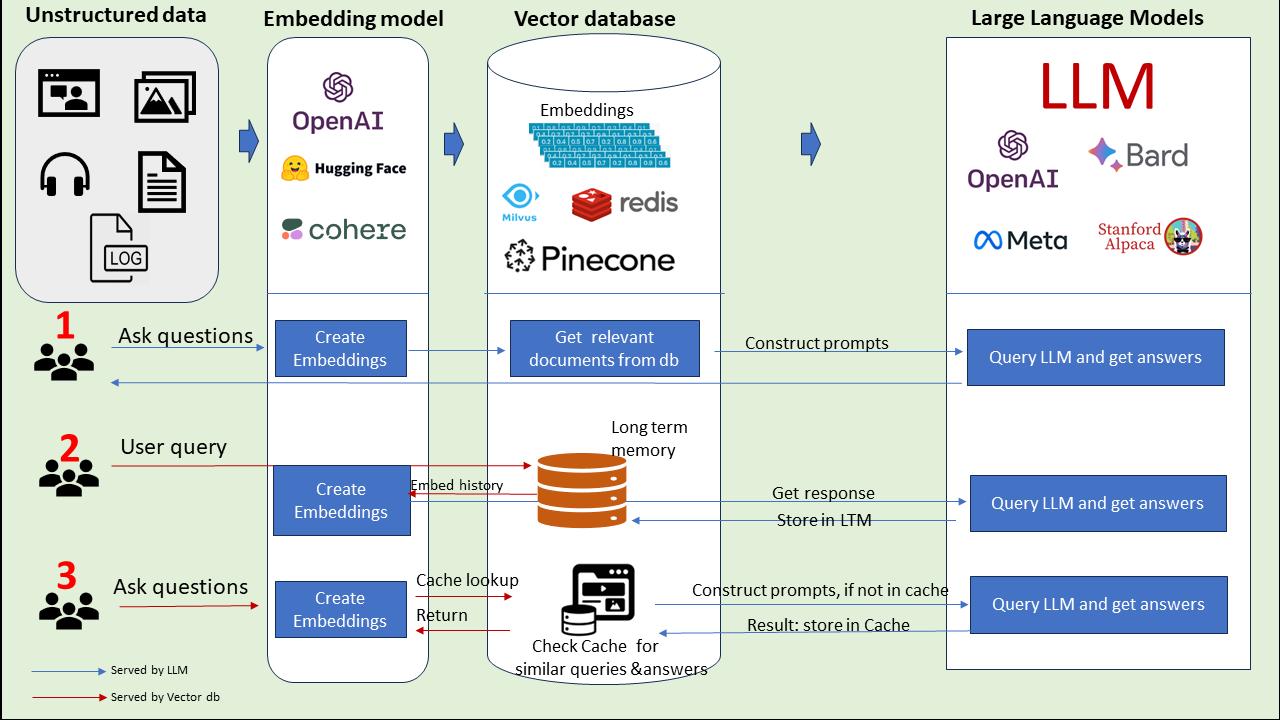

In [34]:
import pandas as pd
from pprint import pprint
import chromadb

# # Set the URL and initialize ChromaDB client
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vSAE2tBAnAdXsxk9a9YClFN7MSEVhzEmJD01ewwtooMLxL-Ilod26EbdD8sZeZk0ybiqD-jqT-9RZbn/pub?gid=497214901&single=true&output=csv"
chroma_client = chromadb.Client()

# Read the CSV file into a DataFrame
df = pd.read_csv(url)
# Limit the DataFrame to the first 10 rows
df = df.head(600)

# Convert the 'tags' column to a list of strings
documents = df["tags"].apply(lambda x: x.split(",")).tolist()
documents_str = [", ".join(doc) for doc in documents]

collection2 = chroma_client.get_or_create_collection(name="my_collection")

# Add the documents to the collection
ids = [str(i + 1) for i in range(len(documents_str))]
collection2.upsert(documents=documents_str, ids=ids)



In [ ]:
# Query the collection
results = collection.query(query_texts=["Data"], n_results=1)

# Print the results
pprint(results)

# Get the ID of the first result
result_id = int(results["ids"][0][0])

# Get the title corresponding to the ID
# title = df.loc[df["video_id"] == result_id, "video_title"].values[0]